TITANIC SURVIVAL PREDICTION

IMPORTING DEPENDENCIES

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [78]:
data = pd.read_csv('/content/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DATA CLEANING

In [80]:
data.isna().sum().sort_values(ascending=False) #Checking for NULL values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [81]:
data.shape

(891, 12)

In [82]:
data['Age'].fillna(data['Age'].mean(),inplace=True) #Filling NULL values in 'Age' column with mean

In [83]:
data.drop('Cabin' , inplace = True ,axis=1) #Dropping 'Cabin' column as it holds no significance in the overall prediction

In [84]:
data['Embarked'] = data['Embarked'].fillna('S') #Filling the two NULL values in 'Embarked' column as 'S'

In [85]:
data.isna().sum().sort_values(ascending=False)
data.dropna(inplace=True)

In [86]:
data.shape

(891, 11)

In [87]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


FEATURE ENGINEERING

In [88]:
Sex = pd.get_dummies(data['Sex'],drop_first=True) #Converting categorical variables to indicator variables, while also avoiding multicollinearity issues
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [89]:
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [90]:
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True) #Drop previous
data = pd.concat([data,Sex,Embarked],axis=1) #Add new
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,1
889,890,1,1,26.000000,0,0,30.0000,1,0,0


DATA VISUALIZATION

In [91]:
correlation_matrix = data.corr()

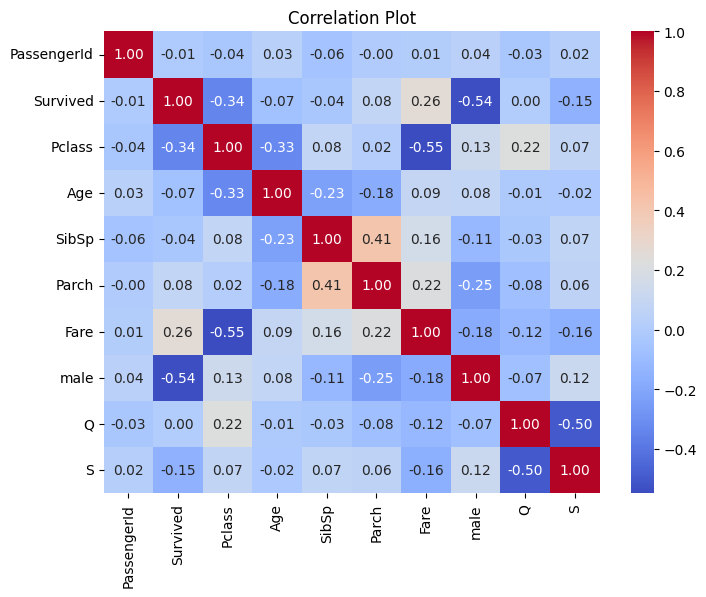

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

For 'Survived' column, we have negligible correlation for 'PassengerId', 'Age', 'SibSp', 'Parch', 'S'. We have zero correlation for 'Q'. We have moderate correlations for 'Pclass', 'Fare', and 'male'. We also have moderate correlation between 'Fare' and 'Pclass', and 'Q' and 'S' (which is obvious).

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
sns.countplot(x = 'Survived' , data=data)

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='male')

In [ ]:
sns.scatterplot(x='Survived', y='Fare', data=data, hue='Survived')
plt.title('Scatter Plot of Survived vs Fare')
plt.show()

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='Pclass')

BUILDING MODELS

In [ ]:
X = data.drop((['Survived' , 'PassengerId']) , axis = 1) #PassengerId contributes nothing
y = data['Survived']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy_lr}')

DECISION TREES

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree}')

RANDOM FOREST CLASSIFIER

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

SUPPORT VECTOR MACHINES

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

COMPARISON

In [ ]:
accuracy_list = [accuracy_lr, accuracy_tree, accuracy_rf, accuracy_svm]
accuracy_list

In [ ]:
model_list = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
model_list

In [ ]:
fig, ax = plt.subplots()
ax.barh(model_list, accuracy_list, color='skyblue')
ax.set_xlabel('Accuracy')
ax.set_title('Comparison of Classification Algorithm Accuracies')
plt.show()